In [1]:
#load directory
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import random

In [2]:
# directory path
os.chdir(r'E:\Project\AIML\NLP')

In [3]:
# opening the zip file in READ mode 
with ZipFile('blog-authorship-corpus.zip', 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
blogtext.csv                                   2019-09-20 22:33:20    800419647
Extracting all the files now...
Done!


In [4]:
# Select random 3500 samples from CSV size due to memory issue in the system
seed=4
random.seed(seed)
filename = 'blogtext.csv'
records_num = 681284
sample_size = 3500
lines2skip = np.random.choice(np.arange(1,records_num+1), (records_num-sample_size), replace=False)
df = pd.read_csv(filename, skiprows=lines2skip)

In [5]:
# check data
df.head()

,id,gender,age,topic,sign,date,text
0,3429420,male,15,Student,Aquarius,"23,May,2004",I looked upon the world A pulsing light...
1,589736,male,35,Technology,Aries,"05,August,2004",it's odd and sad - mary magdalene i...
2,589736,male,35,Technology,Aries,"05,August,2004",still cigarette free. determined ...
3,589736,male,35,Technology,Aries,"05,August,2004",Tech Support Geek Joke: http://ars...
4,589736,male,35,Technology,Aries,"05,August,2004",I am still smoke-free...my last cig...


In [6]:
row,col=df.shape
print('There are {} rows and {} columns'.format(row,col))

There are 3500 rows and 7 columns


In [7]:
# check data types
df.dtypes

id         int64
gender    object
age        int64
topic     object
sign      object
date      object
text      object
dtype: object

In [8]:
df.isnull().any()

id        False
gender    False
age       False
topic     False
sign      False
date      False
text      False
dtype: bool

* There are no null values

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 7 columns):
id        3500 non-null int64
gender    3500 non-null object
age       3500 non-null int64
topic     3500 non-null object
sign      3500 non-null object
date      3500 non-null object
text      3500 non-null object
dtypes: int64(2), object(5)
memory usage: 191.5+ KB


In [10]:
# duplicated text in data based 
df[df.duplicated(subset="text")==True]

,id,gender,age,topic,sign,date,text
533,3522219,female,13,indUnk,Taurus,"02,June,2004",Baby urlLink
602,3179434,male,17,indUnk,Scorpio,"01,August,2004",urlLink
692,2308025,male,23,Law,Libra,"04,December,2003",
1230,3667326,female,25,Automotive,Sagittarius,"17,June,2004",urlLink
1915,1234212,male,27,indUnk,Taurus,"07,April,2003",urlLink
2083,4206717,male,27,Manufacturing,Gemini,"02,August,2004",urlLink The New Yorker tell us .
2084,3408189,female,41,indUnk,Scorpio,"21,May,2004",urlLink
2662,2087401,male,16,Student,Pisces,"04,May,2004","Okay, Sars just wrapped up the Famous G..."
3216,1944324,male,16,Student,Taurus,"04,May,2004","Okay, Sars just wrapped up the Famous G..."


* Duplicate/ blank text entries are present

In [11]:
# Duplicate entry are dorped
df.drop_duplicates(subset="text",inplace=True)

In [12]:
row,col=df.shape
print('There are {} rows and {} columns'.format(row,col))

There are 3491 rows and 7 columns


## EDA

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]), <a list of 40 Text xticklabel objects>)

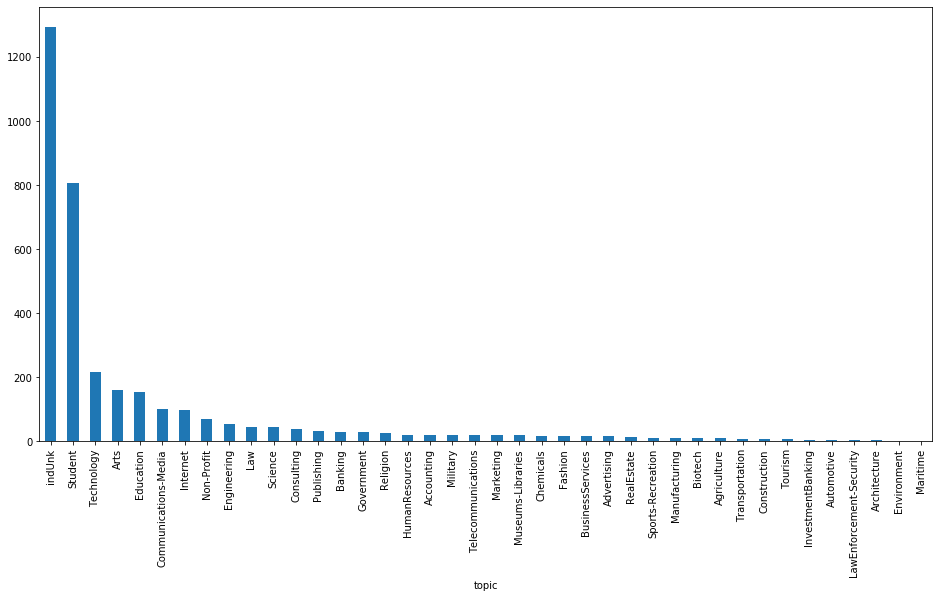

In [13]:
# top trending topics
df.groupby(by='topic')['topic'].count().sort_values(ascending=False).plot.bar(figsize=(16,8))
plt.xticks(rotation=90) 

* Induk, student,technology ,Arts and education are the top trending blogs

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

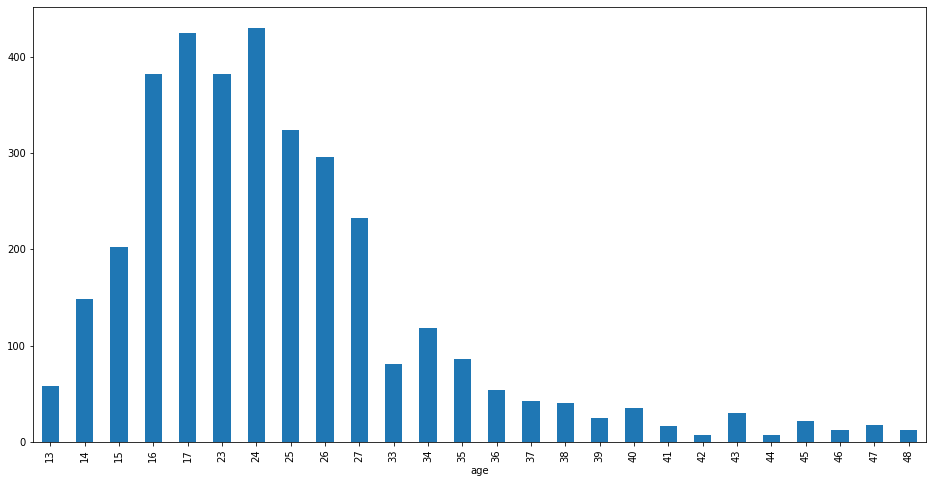

In [14]:
#Age profile of contributer
df.groupby(by='age')['age'].count().plot.bar(figsize=(16,8))
plt.xticks(rotation=90) 

* BLogger are generally agged between 15 to 27 years

(array([0, 1]), <a list of 2 Text xticklabel objects>)

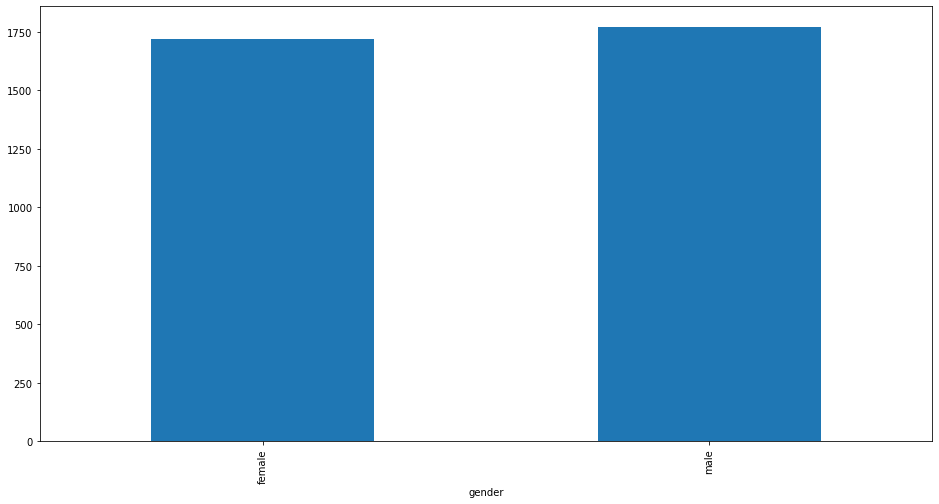

In [15]:
#Gender profile of contributer
df.groupby(by='gender')['gender'].count().plot.bar(figsize=(16,8))
plt.xticks(rotation=90) 

* Female and male blogger are evenly distributed

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

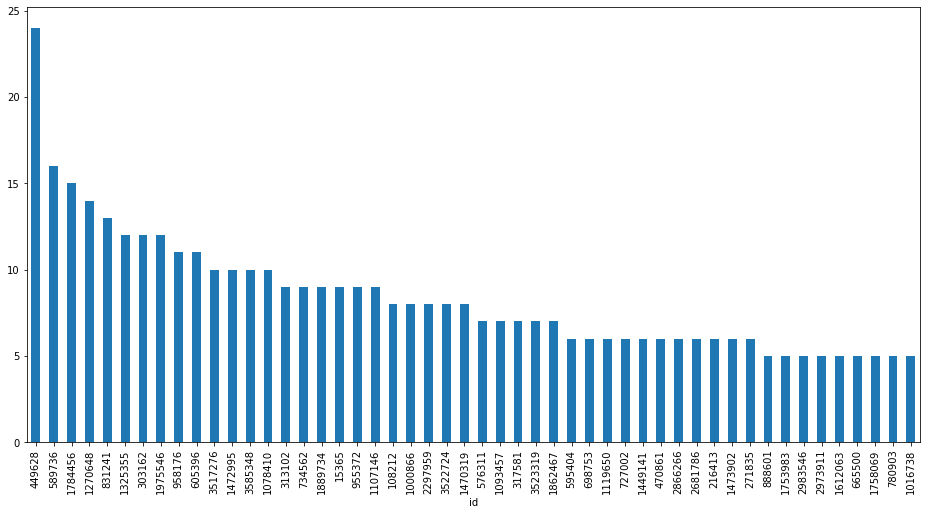

In [16]:
#top 50 contributer
df.groupby(by='id')['id'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(16,8))
plt.xticks(rotation=90)                                                                

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

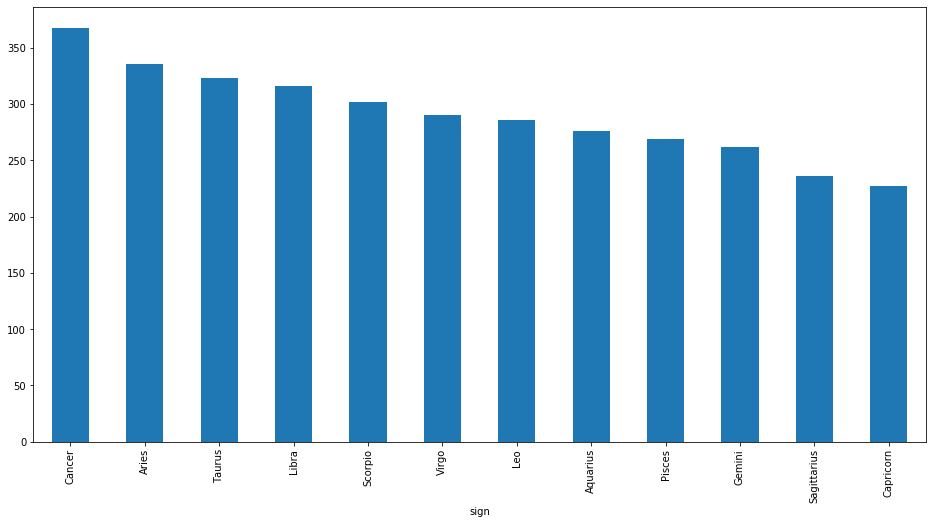

In [17]:
# Start signs of blogger distribution
df.groupby(by='sign')['sign'].count().sort_values(ascending=False).head(50).plot.bar(figsize=(16,8))
plt.xticks(rotation=90)

* Blogger with different star signs are almost evenly distrubuted (350 to 250 number)

# 2. Preprocess rows of the “text” column 

In [18]:
import nltk 
from nltk import word_tokenize
import re

## a)  Remove unwanted character

In [19]:
# first line of text
df.text[0]

'       I looked upon the world A pulsing light  Growing every minute Daring and brave was I  I challenge its unknown might Blood was spilled Tainted the lands A new champion arises  Such was its might I was imprisoned Chained to the bounds of eternity Strength and life was drained from me The brightness in my eye flickered and faded  Sorrows and agony clenched my heart  Fatigue was my constant companion Memories and nightmares haunted me The aura of it presence tremble me every moment Flesh rot and hang from my whitish limbs The seductive allure of hell draws me towards it  Writing the last sentence of my life I watched my life flashed before me Like a rat was I  Staring at the unassailable titan  Witnessing my blade turning to dust My armor my faith swept away with the currents My shield my honor is what I have left  Crows and vultures flew the skies covering the sun to an eclipse  Jokers and minstrels both sang and mock at my foolishness  Perusing his poems And studying mine Looking

In [20]:
# keep only text words
def remove_special_characters(text):    
    pattern =  r'[^a-zA-z\s]'      
    text = re.sub(pattern, '', text)    
    return text

In [21]:
df['text']=[remove_special_characters(text) for text in df.text]

In [22]:
# text after correction
df.text[0]

'       I looked upon the world A pulsing light  Growing every minute Daring and brave was I  I challenge its unknown might Blood was spilled Tainted the lands A new champion arises  Such was its might I was imprisoned Chained to the bounds of eternity Strength and life was drained from me The brightness in my eye flickered and faded  Sorrows and agony clenched my heart  Fatigue was my constant companion Memories and nightmares haunted me The aura of it presence tremble me every moment Flesh rot and hang from my whitish limbs The seductive allure of hell draws me towards it  Writing the last sentence of my life I watched my life flashed before me Like a rat was I  Staring at the unassailable titan  Witnessing my blade turning to dust My armor my faith swept away with the currents My shield my honor is what I have left  Crows and vultures flew the skies covering the sun to an eclipse  Jokers and minstrels both sang and mock at my foolishness  Perusing his poems And studying mine Looking

In [23]:
# remove stemming words
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()    
    text = ' '.join([ps.stem(word) for word in text.split()])   
    return text


In [24]:
df['text']=[simple_stemmer(text) for text in df.text]
# text are stemming correction
df.text[0]

'I look upon the world A puls light grow everi minut dare and brave wa I I challeng it unknown might blood wa spill taint the land A new champion aris such wa it might I wa imprison chain to the bound of etern strength and life wa drain from me the bright in my eye flicker and fade sorrow and agoni clench my heart fatigu wa my constant companion memori and nightmar haunt me the aura of it presenc trembl me everi moment flesh rot and hang from my whitish limb the seduct allur of hell draw me toward it write the last sentenc of my life I watch my life flash befor me like a rat wa I stare at the unassail titan wit my blade turn to dust My armor my faith swept away with the current My shield my honor is what I have left crow and vultur flew the sky cover the sun to an eclips joker and minstrel both sang and mock at my foolish perus hi poem and studi mine look down at my own demis drown my heart and soul'

## b) Convert text to lower case

In [25]:
# change to lower case
df.text=df.text.str.lower()
df.text[0]

'i look upon the world a puls light grow everi minut dare and brave wa i i challeng it unknown might blood wa spill taint the land a new champion aris such wa it might i wa imprison chain to the bound of etern strength and life wa drain from me the bright in my eye flicker and fade sorrow and agoni clench my heart fatigu wa my constant companion memori and nightmar haunt me the aura of it presenc trembl me everi moment flesh rot and hang from my whitish limb the seduct allur of hell draw me toward it write the last sentenc of my life i watch my life flash befor me like a rat wa i stare at the unassail titan wit my blade turn to dust my armor my faith swept away with the current my shield my honor is what i have left crow and vultur flew the sky cover the sun to an eclips joker and minstrel both sang and mock at my foolish perus hi poem and studi mine look down at my own demis drown my heart and soul'

## c) Remove extra white spaces

In [26]:
def remove_white_space(text):    
    text = re.sub(' +', ' ', text)   
    return text

In [27]:
 # remove extra whitespace        
df.text=[remove_white_space(text) for text in df.text]
df.text[0]

'i look upon the world a puls light grow everi minut dare and brave wa i i challeng it unknown might blood wa spill taint the land a new champion aris such wa it might i wa imprison chain to the bound of etern strength and life wa drain from me the bright in my eye flicker and fade sorrow and agoni clench my heart fatigu wa my constant companion memori and nightmar haunt me the aura of it presenc trembl me everi moment flesh rot and hang from my whitish limb the seduct allur of hell draw me toward it write the last sentenc of my life i watch my life flash befor me like a rat wa i stare at the unassail titan wit my blade turn to dust my armor my faith swept away with the current my shield my honor is what i have left crow and vultur flew the sky cover the sun to an eclips joker and minstrel both sang and mock at my foolish perus hi poem and studi mine look down at my own demis drown my heart and soul'

## d) Remove stopwords

In [28]:
from string import punctuation
from nltk.corpus import stopwords
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gagandeep.risam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gagandeep.risam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
stop_words=stopwords.words('english') + list(punctuation)

In [30]:
# funciton to remove stopwards
def remove_stopwords(text):
    tokens =  word_tokenize(text)   
    tokens = [token.strip() for token in tokens]     
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]   
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

In [31]:
df.text=[remove_stopwords(text) for text in df.text]
df.text[0]

'look upon world puls light grow everi minut dare brave wa challeng unknown might blood wa spill taint land new champion aris wa might wa imprison chain bound etern strength life wa drain bright eye flicker fade sorrow agoni clench heart fatigu wa constant companion memori nightmar haunt aura presenc trembl everi moment flesh rot hang whitish limb seduct allur hell draw toward write last sentenc life watch life flash befor like rat wa stare unassail titan wit blade turn dust armor faith swept away current shield honor left crow vultur flew sky cover sun eclips joker minstrel sang mock foolish perus hi poem studi mine look demis drown heart soul'

## 3.  Merge all the label columns together

In [32]:
# Age label in not catorgized in two 3 groups as mentioned in  project document

In [33]:
# cut_bins=[10,20,30,50]
# cut_labels=['10s','20s','30s']

In [34]:
# df['age_brkt'] = pd.cut(df['age'], bins=cut_bins, labels=cut_labels)

In [35]:
# df.head()

In [36]:
# store in array to run the for loop faster
temp=np.array(df) 

In [37]:
df['labels']=np.zeros(len(df))

for i in tqdm(np.arange(len(df))):
    df['labels'].iloc[i]=list(map(str,temp[i,1:5]))

  0%|                                                                                         | 0/3491 [00:00<?, ?it/s]D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|████████████████████████████████████████████████████████████████████████████| 3491/3491 [00:00<00:00, 3590.10it/s]


In [38]:
list(map(str,temp[0,1:5]))

['male', '15', 'Student', 'Aquarius']

In [39]:
df.head()

,id,gender,age,topic,sign,date,text,labels
0,3429420,male,15,Student,Aquarius,"23,May,2004",look upon world puls light grow everi minut da...,"[male, 15, Student, Aquarius]"
1,589736,male,35,Technology,Aries,"05,August,2004",odd sad mari magdalen peter juda,"[male, 35, Technology, Aries]"
2,589736,male,35,Technology,Aries,"05,August,2004",still cigarett free determin beat thi time,"[male, 35, Technology, Aries]"
3,589736,male,35,Technology,Aries,"05,August,2004",tech support geek joke httparsuserfriendlyorgc...,"[male, 35, Technology, Aries]"
4,589736,male,35,Technology,Aries,"05,August,2004",still smokefreemi last cigarett wa thursday ni...,"[male, 35, Technology, Aries]"


In [40]:
doc=df.copy()[['text','labels']]

In [41]:
doc.head()

,text,labels
0,look upon world puls light grow everi minut da...,"[male, 15, Student, Aquarius]"
1,odd sad mari magdalen peter juda,"[male, 35, Technology, Aries]"
2,still cigarett free determin beat thi time,"[male, 35, Technology, Aries]"
3,tech support geek joke httparsuserfriendlyorgc...,"[male, 35, Technology, Aries]"
4,still smokefreemi last cigarett wa thursday ni...,"[male, 35, Technology, Aries]"


## 4. Separate features and labels, and split the data into training and testin

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(doc.text,doc.labels,test_size=.25,random_state=seed)

In [44]:
print('Train size : {}\nTest size : {}'.format(x_train.shape[0],x_test.shape[0]))

Train size : 2618
Test size : 873


In [45]:
x_train.head()

654     well dont usual post lyric song havent written...
88                                         urllink awesom
555     urllink wa sad today hear death ronald reagan ...
2089    click thi link love ever ever urllink total fu...
431     oooo yeahhh sweeettt ahhahah long n dread exer...
Name: text, dtype: object

In [46]:
y_train.head()

654     [male, 16, Communications-Media, Scorpio]
88                    [male, 15, Government, Leo]
555                    [male, 26, indUnk, Cancer]
2089               [female, 24, indUnk, Aquarius]
431                       [male, 23, indUnk, Leo]
Name: labels, dtype: object

## 5. Vectorize the features

## a) Create a Bag of Words using count vectorizer

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
# include 1-grams and 2-grams
cv = CountVectorizer(ngram_range=(1, 2))
cv = cv.fit(doc.text)

In [49]:
doc_matrix=cv.transform(doc.text)

In [50]:
doc_matrix= doc_matrix.toarray()

In [51]:
vocab = cv.get_feature_names()

In [52]:
cv.vocabulary_

{'look': 150990,
 'upon': 272230,
 'world': 292693,
 'puls': 202958,
 'light': 145987,
 'grow': 107385,
 'everi': 79641,
 'minut': 163969,
 'dare': 58478,
 'brave': 31505,
 'wa': 278310,
 'challeng': 40522,
 'unknown': 271538,
 'might': 162650,
 'blood': 28518,
 'spill': 238887,
 'taint': 249813,
 'land': 140319,
 'new': 173934,
 'champion': 40607,
 'aris': 13287,
 'imprison': 126211,
 'chain': 40418,
 'bound': 30667,
 'etern': 78357,
 'strength': 244200,
 'life': 145327,
 'drain': 69432,
 'bright': 32209,
 'eye': 82738,
 'flicker': 90213,
 'fade': 83576,
 'sorrow': 236973,
 'agoni': 4085,
 'clench': 45205,
 'heart': 114292,
 'fatigu': 85300,
 'constant': 50606,
 'companion': 48632,
 'memori': 161061,
 'nightmar': 175899,
 'haunt': 113113,
 'aura': 16554,
 'presenc': 199154,
 'trembl': 266475,
 'moment': 165496,
 'flesh': 90074,
 'rot': 216062,
 'hang': 111375,
 'whitish': 288591,
 'limb': 147694,
 'seduct': 222803,
 'allur': 5827,
 'hell': 115159,
 'draw': 69557,
 'toward': 265224,
 '

In [53]:
print ('{} unique vocabulary words/features are developed based on {} documents'.format(doc_matrix.shape[1],doc_matrix.shape[0]))

299057 unique vocabulary words/features are developed based on 3491 documents


In [54]:
# show term document matrix
print ( '+++++++++++++++++++Term document matrix for Complete data set+++++++++++++++++++++++++')
pd.DataFrame(doc_matrix, columns=vocab)

+++++++++++++++++++Term document matrix for Complete data set+++++++++++++++++++++++++


,__,__ feel,__ notic,___,___ __,___ look,___ veri,___ wasnt,___ ye,____,...,zzzz,zzzz bed,zzzzzz,zzzzzz wake,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzz hope,zzzzzzzzzzzzzzznbsp,zzzzzzzzzzzzzzznbsp urllink,zzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzz around
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## ii) Vectorize training and testing features

In [55]:
x_train=cv.transform(x_train)

In [56]:
# show document feature vectors
print ( '+++++++++++++++++++Term document matrix for train data set+++++++++++++++++++++++++')
pd.DataFrame(x_train.toarray(), columns=vocab)

+++++++++++++++++++Term document matrix for train data set+++++++++++++++++++++++++


,__,__ feel,__ notic,___,___ __,___ look,___ veri,___ wasnt,___ ye,____,...,zzzz,zzzz bed,zzzzzz,zzzzzz wake,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzz hope,zzzzzzzzzzzzzzznbsp,zzzzzzzzzzzzzzznbsp urllink,zzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzz around
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
x_test=cv.transform(x_test)

In [58]:
# show term docuement matrix for test data
print ( '+++++++++++++++++++Term document matrix for test data set+++++++++++++++++++++++++')
pd.DataFrame(x_test.toarray(), columns=vocab)

+++++++++++++++++++Term document matrix for test data set+++++++++++++++++++++++++


,__,__ feel,__ notic,___,___ __,___ look,___ veri,___ wasnt,___ ye,____,...,zzzz,zzzz bed,zzzzzz,zzzzzz wake,zzzzzzzzzzzzzzz,zzzzzzzzzzzzzzz hope,zzzzzzzzzzzzzzznbsp,zzzzzzzzzzzzzzznbsp urllink,zzzzzzzzzzzzzzzzzzzzzzzzzzz,zzzzzzzzzzzzzzzzzzzzzzzzzzz around
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Create a dictionary to get the count of every label i.e. the key will be label name and value will be the total count of the label.

In [59]:
# conver to list ot strings in each cell of array
texts=doc.labels.apply(lambda x : ' '.join([str(elem) for elem in x]))

lab_cv = CountVectorizer()   
lab_cv_fit=lab_cv.fit_transform(texts) 
# name of labels in a list
word_list =lab_cv.get_feature_names() 
# count of labels in a list
count_list =list(lab_cv_fit.toarray().sum(axis=0) )

In [60]:
# function to create a list
def get_dic_from_two_lists(keys, values):
    return { keys[i] : values[i] for i in range(len(keys)) }
#Create a list
get_dic_from_two_lists(word_list, count_list)

{'13': 58,
 '14': 149,
 '15': 203,
 '16': 382,
 '17': 425,
 '23': 382,
 '24': 430,
 '25': 324,
 '26': 296,
 '27': 233,
 '33': 81,
 '34': 118,
 '35': 86,
 '36': 54,
 '37': 43,
 '38': 41,
 '39': 25,
 '40': 35,
 '41': 17,
 '42': 7,
 '43': 30,
 '44': 7,
 '45': 22,
 '46': 13,
 '47': 18,
 '48': 12,
 'accounting': 21,
 'advertising': 17,
 'agriculture': 11,
 'aquarius': 276,
 'architecture': 3,
 'aries': 336,
 'arts': 159,
 'automotive': 5,
 'banking': 29,
 'biotech': 11,
 'businessservices': 17,
 'cancer': 368,
 'capricorn': 227,
 'chemicals': 18,
 'communications': 102,
 'construction': 7,
 'consulting': 38,
 'education': 154,
 'engineering': 54,
 'environment': 2,
 'fashion': 18,
 'female': 1721,
 'gemini': 262,
 'government': 28,
 'humanresources': 21,
 'indunk': 1292,
 'internet': 98,
 'investmentbanking': 5,
 'law': 45,
 'lawenforcement': 4,
 'leo': 286,
 'libra': 316,
 'libraries': 20,
 'male': 1770,
 'manufacturing': 12,
 'maritime': 1,
 'marketing': 20,
 'media': 102,
 'military': 21

## 7.  Transform the labels

In [61]:
from sklearn.preprocessing import MultiLabelBinarizer
# Create MultiLabelBinarizer object
mlb = MultiLabelBinarizer()

In [62]:
y_train.head()

654     [male, 16, Communications-Media, Scorpio]
88                    [male, 15, Government, Leo]
555                    [male, 26, indUnk, Cancer]
2089               [female, 24, indUnk, Aquarius]
431                       [male, 23, indUnk, Leo]
Name: labels, dtype: object

In [63]:
# Encode train labels
y_train=mlb.fit_transform(y_train)

In [64]:
# number of label class
print('There are {} class labels'.format(mlb.classes_.size))
# View classes
mlb.classes_

There are 80 class labels


array(['13', '14', '15', '16', '17', '23', '24', '25', '26', '27', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', 'Accounting', 'Advertising', 'Agriculture',
       'Aquarius', 'Architecture', 'Aries', 'Arts', 'Automotive',
       'Banking', 'Biotech', 'BusinessServices', 'Cancer', 'Capricorn',
       'Chemicals', 'Communications-Media', 'Construction', 'Consulting',
       'Education', 'Engineering', 'Environment', 'Fashion', 'Gemini',
       'Government', 'HumanResources', 'Internet', 'InvestmentBanking',
       'Law', 'LawEnforcement-Security', 'Leo', 'Libra', 'Manufacturing',
       'Maritime', 'Marketing', 'Military', 'Museums-Libraries',
       'Non-Profit', 'Pisces', 'Publishing', 'RealEstate', 'Religion',
       'Sagittarius', 'Science', 'Scorpio', 'Sports-Recreation',
       'Student', 'Taurus', 'Technology', 'Telecommunications', 'Tourism',
       'Transportation', 'Virgo', 'female', 'indUnk', 'male'],
      dtype

In [65]:
#Encode train labels
pd.DataFrame(y_train,columns=mlb.classes_).head()

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [66]:
y_test.head()

204         [female, 15, indUnk, Scorpio]
229     [female, 39, indUnk, Sagittarius]
483              [male, 24, Arts, Cancer]
1109          [female, 38, indUnk, Virgo]
1929         [female, 24, Student, Aries]
Name: labels, dtype: object

In [67]:
# Encode test labels
y_test=mlb.transform(y_test)

In [68]:
#Encode test labels
pd.DataFrame(y_test,columns=mlb.classes_).head()

,13,14,15,16,17,23,24,25,26,27,...,Student,Taurus,Technology,Telecommunications,Tourism,Transportation,Virgo,female,indUnk,male
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0


## 8.  Choose a classifier

In [69]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

In [70]:
# linear classifier for multilable classificaiton
clf=LogisticRegression(solver='lbfgs',max_iter=200)
# wrapper for multilabel classification
clf=OneVsRestClassifier(clf)

## 9. Fit the classifier, make predictions and get the accuracy

In [71]:
# fit the model to train data
clf.fit(x_train,y_train)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=200,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [72]:
y_predict=clf.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score, precision_score,recall_score,hamming_loss,jaccard_similarity_score

In [74]:
print ('Accuracy score : {}'.format(accuracy_score(y_test,y_predict)))

Accuracy score : 0.003436426116838488


* In multilabel classification, this function computes subset accuracy : the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.Partial match is not considered as no match. In this case accuracy value of 0 indicates no extact match of any of test set of labels. 

In [75]:
print ('F1_score : {}'.format(f1_score(y_test,y_predict,average='weighted')))

F1_score : 0.20583327862329318


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


* Averge setting to weigthed will calculate the precision metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters effect of label imbalance seen in the data set

In [76]:
print ('Precision_score : {}'.format(precision_score(y_test,y_predict,average='weighted')))

Precision_score : 0.29235844188564525


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* Averge setting to weigthed will calculate the precision metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters effect of  label imbalance seen in the data set.

In [77]:
print ('Recall_score : {}'.format(recall_score(y_test,y_predict,average='weighted')))

Recall_score : 0.18900343642611683


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


* Averge setting to weigthed will calculate the precision metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters effect of  label imbalance seen in the data set.

In [78]:
print ('Jaccard similarity : {:5.3f}'.format(jaccard_similarity_score(y_test,y_predict)))

Jaccard similarity : 0.176


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


* Jacard similarity measure is another measure typically used for multilablel classifcaiotn metric indicating  17% accuracy.
* Defined as the number of correctly predicted labels divided by the union of predicted and true labels.

In [79]:
print ('Haming_Loss : {:5.3f}'.format(hamming_loss(y_test,y_predict)))

Haming_Loss : 0.049


* Hamming Loss calculates loss generated in the bit string (tag) of class labels during prediction insead extact  correct classification of sample's set of labels. Loss value of 0.05 indicates good classification.(lower the bettter), which is surprising (needs to investigated further.)

* Overall label classificaiton accuracy is arround 16-30% on different measures. Lower accurracy can be attributed to very smaller smaple size (0.25% - 3500 samples only due to memory issue), 80( large number of labels) labels for classification  and 291561 features.

## Print true label and predicted label for any five examples

In [80]:
Label_num=5
seed=4
import random
random.seed(seed)
print ('Actual Vs predicted')
#Generate 5 random numbers between 10 and 2000
randomlist = random.sample(range(10, 400),Label_num)

for i in randomlist :
    print ('\n\nTest Sample no : {} '.format(i))
    print('Actual    : ',mlb.inverse_transform(y_test)[i])
    print('Predicted : ',mlb.inverse_transform(y_predict)[i])
    print('\nPredict Proba Values for Top 5 Labels')
    print('{}'.format(pd.DataFrame(clf.predict_proba(x_test[i]),columns=mlb.classes_).iloc[0].sort_values(ascending=False)[0:5]))

Actual Vs predicted


Test Sample no : 130 
Actual    :  ('24', 'Arts', 'Pisces', 'female')
Predicted :  ('female',)

Predict Proba Values for Top 5 Labels
female     0.826226
Leo        0.355568
Cancer     0.286871
indUnk     0.237140
Student    0.175829
Name: 0, dtype: float64


Test Sample no : 165 
Actual    :  ('15', 'Capricorn', 'indUnk', 'male')
Predicted :  ('female', 'indUnk')

Predict Proba Values for Top 5 Labels
indUnk     0.670482
female     0.589882
male       0.410118
Student    0.224836
Taurus     0.098926
Name: 0, dtype: float64


Test Sample no : 62 
Actual    :  ('17', 'Gemini', 'indUnk', 'male')
Predicted :  ('Student', 'female')

Predict Proba Values for Top 5 Labels
Student    0.972073
female     0.725963
male       0.274037
17         0.126910
Gemini     0.093206
Name: 0, dtype: float64


Test Sample no : 379 
Actual    :  ('16', 'Student', 'Virgo', 'male')
Predicted :  ('female', 'indUnk')

Predict Proba Values for Top 5 Labels
indUnk     0.712489
female     0.5

* label values with proabability >0.50 are reproted as predicted lables.
* Labels with higher support values like male, female ,INDUk,student appear more frequently in the predicted values as expected.(majority class effect)